### This week lab is about decision tree algorithm. We will use scikit-learn ML Pythpn library for this lab. 

In [1]:
# to install scikit-learn: pip install -U scikit-learn
# For other installation ways refer to: https://scikit-learn.org/stable/install.html
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

[`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) is a class capable of performing multi-class classification on a dataset using the decison tree algorithm. 

`DecisionTreeClassifier` takes as input two arrays: an array X, sparse or dense, of size `[n_samples, n_features]` holding the training samples, and an array Y of integer values, size `[n_samples]`, holding the class labels for the training samples:

In [2]:
# let's start with really simple example
X = [[0, 0], [1, 1]] # input 
Y = [0, 1] # target
# Define the decision tree classifier
clf = tree.DecisionTreeClassifier()
# train/fit the classifer on our data
clf = clf.fit(X, Y) 

In [3]:
# After being fitted, the model can then be used to predict the class of samples:
clf.predict([[2., 2.]])

array([1])

In [4]:
# Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

#### Now let's train the decision tree classfier on a real dataset called the iris data. 
####  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 


There are four features
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

And the three classes are

0. Iris Setosa
1. Iris Versicolour
2. Iris Virginica



In [9]:
# scikit-learn has the iris data 
from sklearn.datasets import load_iris

# loading the data 
X, y = load_iris(return_X_y=True)

# let's see some samples
# Inputs 
print(X[0::50])
# and their targets
print(y[0::50])

[[5.1 3.5 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.3 3.3 6.  2.5]]
[0 1 2]


In [11]:
# Before we define the classifier, we would like to know which crtieron to use 
# to measure the quality of a split. We know there are two criteria:
# “gini” for the Gini impurity and “entropy” for the information gain.
# The first one is used in the CART algorithm and the second is used in 
# the ID3 algorithm

# To choose which algorithm to use in the decision tree algorithm we can just 
# the criterion argument we pass to DecisionTreeClassifier class to "gini" for CART algorithm 
# and "entropy" for the ID3 algorithm


# For now we will use the ID3 algorithm 
clf = tree.DecisionTreeClassifier(criterion="entropy")
# fit the model on our data
clf = clf.fit(X, y)

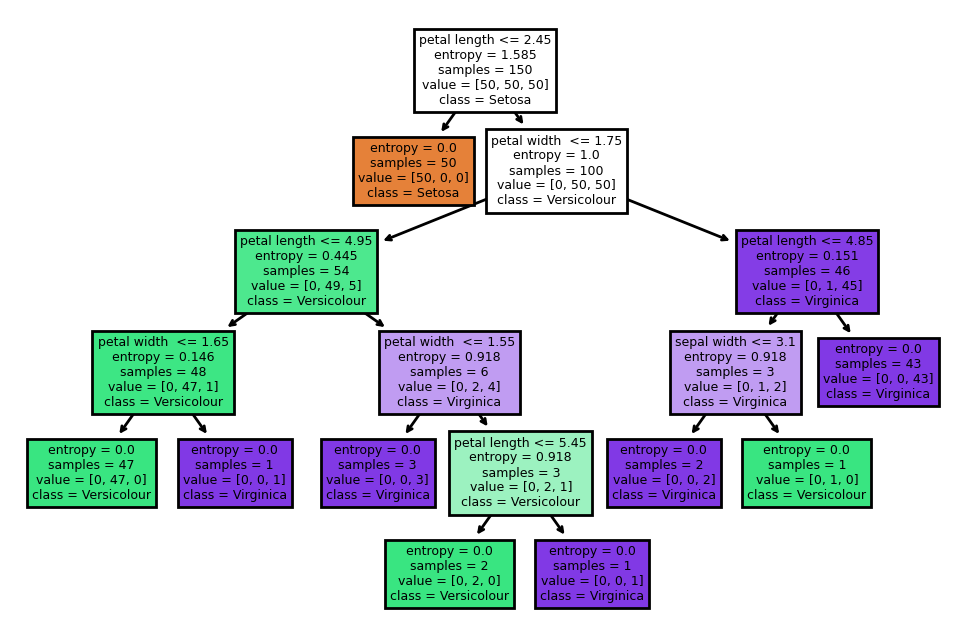

In [12]:
# Now let's show the constructed tree 
plt.figure(dpi=200)
tree.plot_tree(clf, filled=True, feature_names=['sepal length', 'sepal width','petal length','petal width '],
               class_names=['Setosa', 'Versicolour', 'Virginica'])
plt.show()

# Exercises 

In [13]:
#TODO: Build the decision tree classifier on the same dataset using the CART algorithm 
# and show the constructed tree 


In [15]:
# build the classfier using CART algorithm
cart_clf = tree.DecisionTreeClassifier(criterion= "gini")
# fit the model on our data
cart_clf = cart_clf.fit(X,y)

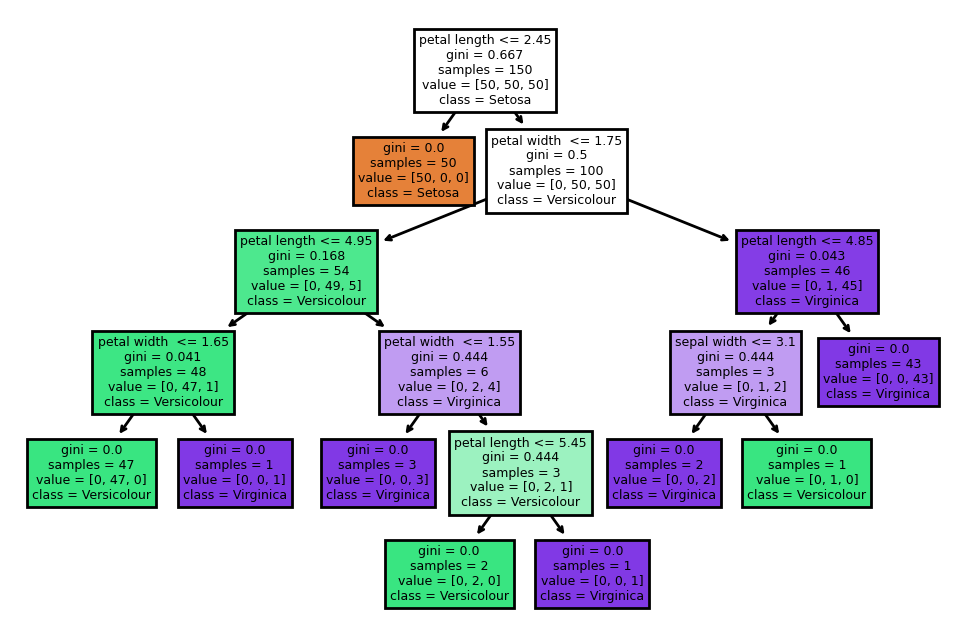

In [16]:
# Now let's show the constructed tree 
plt.figure(dpi=200)
tree.plot_tree(cart_clf, filled=True, feature_names=['sepal length', 'sepal width','petal length','petal width '],
               class_names=['Setosa', 'Versicolour', 'Virginica'])
plt.show()

In [ ]:
# is there any different between the two the constructed trees ?

In [ ]:
# let's compare between the two algorithm with spliting the data into train set and test set 

In [17]:
# Lets shuffle and split the data

# Randomly order the data
order = list(range(np.shape(X)[0]))
np.random.shuffle(order)
X = X[order,:]
Y = y[order]

In [30]:
# splitting the data
train = X[:130]
traint = y[:130]
test = X[130:]
testt = y[130:]
print(train.shape, traint.shape, test.shape, testt.shape)

(130, 4) (130,) (20, 4) (20,)


In [31]:
# TODO: Train the decision tree classifier using both algorithms (ID3 and CART) on the train set 
# and compute the test accuracy of both classifiers on the test set. 

In [32]:
#TODO: train the classifier using ID3 


clf_id3 = tree.DecisionTreeClassifier(criterion= "entropy")
# fit the model on our data
clf_id3 = clf_id3.fit(train,traint)
# test 
y_pred = clf_id3.predict(test)
# accuracy
accuracy = clf_id3.score(test,testt)
print(accuracy)

0.35


In [35]:
#TODO: train the classifier using CART 

clf_cart = tree.DecisionTreeClassifier()
# fit the model on our data
clf_cart = clf_cart.fit(train,traint)
# test 
y_pred = clf_cart.predict(test)
# accuracy
accuracy = clf_cart.score(test,testt)
print(accuracy)

0.25
